In [380]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [381]:
churn_df=pd.read_csv("telecom_churn_data.csv")

In [382]:
churn_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [383]:
cat_cols=churn_df.select_dtypes(include='object').columns
cat_cols

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [384]:
num_cols=churn_df.select_dtypes(exclude='object').columns
num_cols

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Data quick checks**

In [386]:
churn_df.shape

(2000, 16)

In [387]:
churn_df.size

32000

In [388]:
len(churn_df)

2000

In [389]:
churn_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [390]:
churn_df.tail()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [391]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [392]:
churn_df['gender'].isnull().sum()

24

In [393]:
churn_df['maximum_days_inactive'].isnull().sum()

28

In [394]:
churn_df['churn'].isnull().sum()

35

In [395]:
churn_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

**Missing value analysis**

In [397]:
c_mode=churn_df['gender'].mode().values[0]

In [398]:
churn_df['gender']=churn_df['gender'].fillna(c_mode)

In [399]:
churn_df['gender'].isnull().sum()

0

In [400]:
c_ma_mean=round(churn_df['maximum_days_inactive'].mean(),0)

In [401]:
churn_df['maximum_days_inactive']=churn_df['maximum_days_inactive'].fillna(int(c_ma_mean))

In [402]:
churn_df['maximum_days_inactive'].isnull().sum()

0

In [403]:
chu_mode=churn_df['churn'].mode().values[0]

In [404]:
churn_df['churn']=churn_df['churn'].fillna(chu_mode)

In [405]:
churn_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**Data cleaning**

In [407]:
churn_df1=churn_df.drop(columns=['customer_id','phone_no'])

In [408]:
churn_df1

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


**cat columns analysis**

In [410]:
cat_cols1=churn_df1.select_dtypes(include='object').columns
cat_cols1

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [411]:
num_cols1=churn_df1.select_dtypes(exclude='object').columns
num_cols1

Index(['year', 'age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'maximum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'maximum_days_inactive', 'customer_support_calls',
       'churn'],
      dtype='object')

**Bar charts**

In [413]:
pdf2=churn_df1['gender'].value_counts()
k=pdf2.keys()
v=pdf2.values
pdf2

gender
Male      1077
Female     923
Name: count, dtype: int64

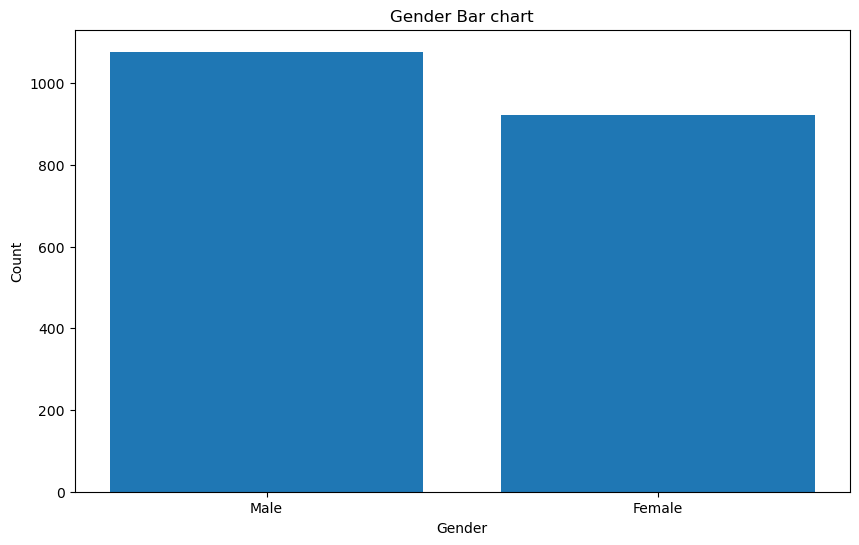

In [414]:
plot(k,v,'Gender')

In [415]:
pdf1=churn_df1['multi_screen'].value_counts()
k=pdf1.keys()
v=pdf1.values
pdf1

multi_screen
no     1802
yes     198
Name: count, dtype: int64

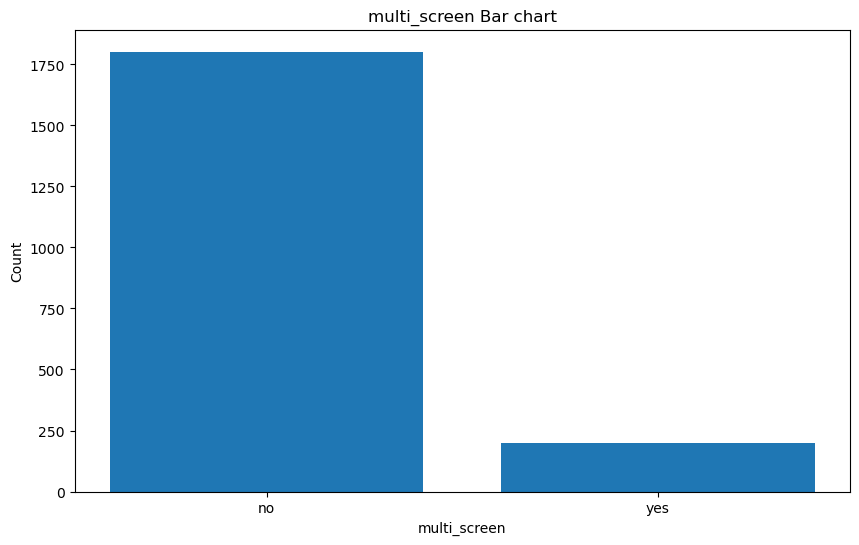

In [416]:
plot(k,v,'multi_screen')
plt.show()

In [417]:
pdf3=churn_df1['mail_subscribed'].value_counts()
k=pdf3.keys()
v=pdf3.values
pdf3

mail_subscribed
no     1430
yes     570
Name: count, dtype: int64

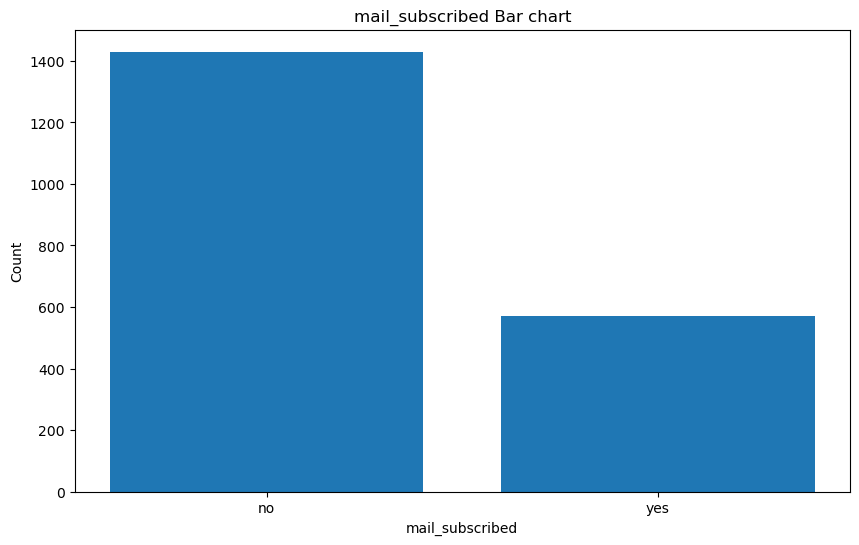

In [418]:
plot(k,v,'mail_subscribed')

In [419]:
def plot(k,v,i):
    plt.figure(figsize=(10,6))
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.bar(k,v)
    plt.title(f"{i} Bar chart")



**Key observations**
- The total population is 2000 people out of which: Male=53.85% and Female = 46.15%
- The distribution of multi_screen is No= 90.1% and yes= 9.9%
- **Insight drawn is**
  - A majority of the population (90.1%) does not use multi-screen functionality.
  - Only a small portion (9.9%) utilizes multi-screen functionality.
- the distibution of mail_subsricbed is No= 71.5% and Yes = 28.5%
- **Insight Drawn is**
  - A significant majority (71.5%) of the population is not subscribed to mail.
  - A smaller portion (28.5%) has opted into mail subscriptions.

**numerical Column Analysis**

In [422]:
churn_df1.describe()

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.0,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,0.0,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,2015.0,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


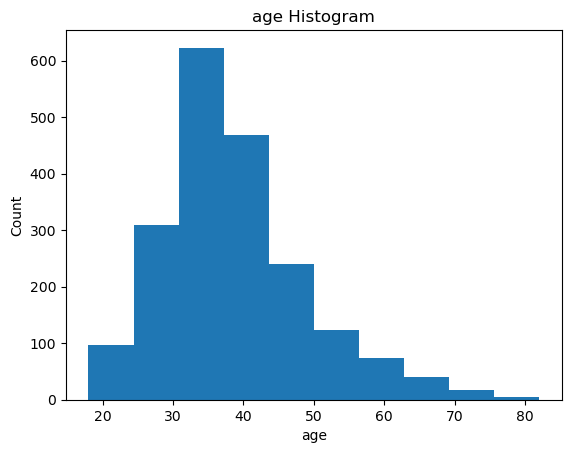

In [423]:
x=churn_df1['age']
plt.hist(x)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('age Histogram')
plt.show()

**Key Insights**
- The distribution shows the highest frequency **(623)** in the third bin (values between 30.8 and 37.2).

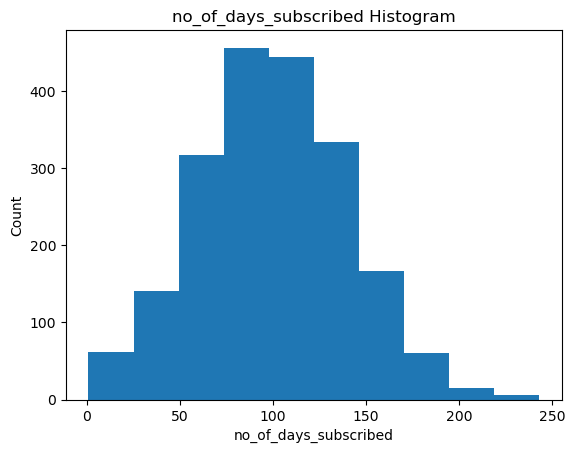

In [425]:
x=churn_df1['no_of_days_subscribed']
plt.hist(x)
plt.xlabel('no_of_days_subscribed')
plt.ylabel('Count')
plt.title('no_of_days_subscribed Histogram')
plt.show()

**Key Insights**
- The distribution shows the highest frequency **(456)** in the fourth bin (values between 73.6 and 97.8).

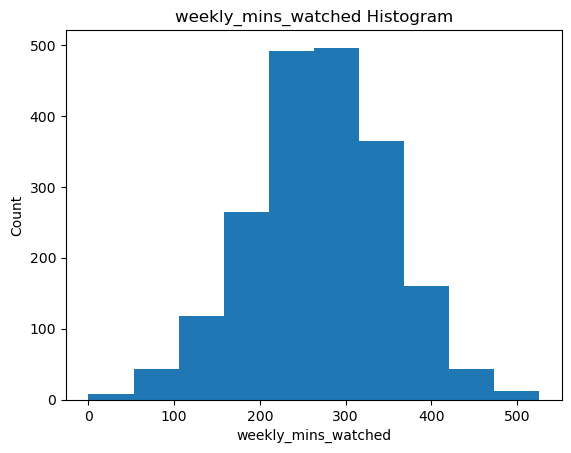

In [427]:
x=churn_df1['weekly_mins_watched']
plt.hist(x)
plt.xlabel('weekly_mins_watched')
plt.ylabel('Count')
plt.title('weekly_mins_watched Histogram')
plt.show()


**Key Insights**
- The 5th and 6th bins (210.48 - 263.1 and 263.1 - 315.72) have the highest frequencies of 491 and 496, respectively.
- Frequencies decrease significantly outside the peak bins, with only 8 occurrences in the first bin and 12 in the last bin.

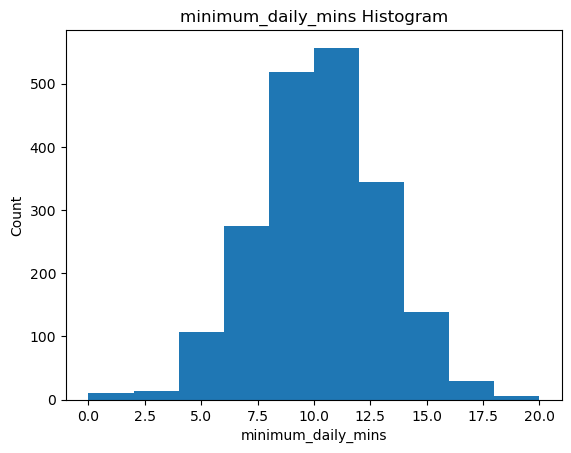

In [429]:
x=churn_df1['minimum_daily_mins']
plt.hist(x)
plt.xlabel('minimum_daily_mins')
plt.ylabel('Count')
plt.title('minimum_daily_mins Histogram')
plt.show()

**Key observation**
- The 5th (8-10) and 6th (10-12) bins have the highest counts, 519 and 557, respectively, indicating that most data points are concentrated in this range.

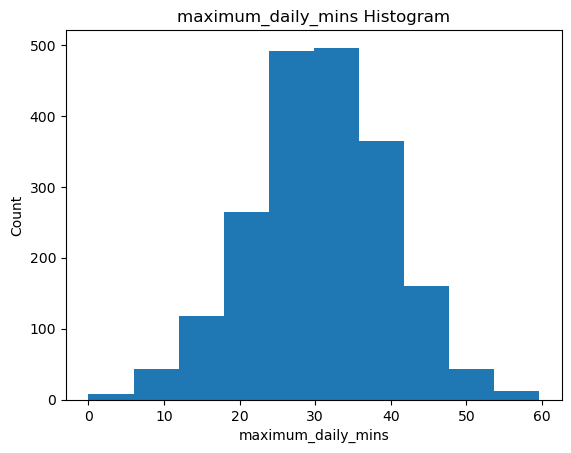

In [431]:
x=churn_df1['maximum_daily_mins']
plt.hist(x)
plt.xlabel('maximum_daily_mins')
plt.ylabel('Count')
plt.title('maximum_daily_mins Histogram')
plt.show()

**Key observation**
- The 5th bin (23.856 - 29.82) and 6th bin (29.82 - 35.784) have the highest frequencies: 491 and 496, respectively.

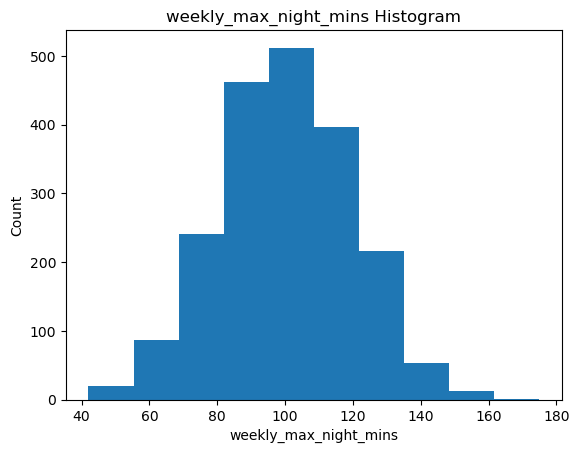

In [433]:
x=churn_df1['weekly_max_night_mins']
plt.hist(x)
plt.xlabel('weekly_max_night_mins')
plt.ylabel('Count')
plt.title('weekly_max_night_mins Histogram')
plt.show()

**Key observations**
- The 5th bin (95.2–108.5) has the highest frequency of 512, followed by the 4th bin (81.9–95.2) with 462.

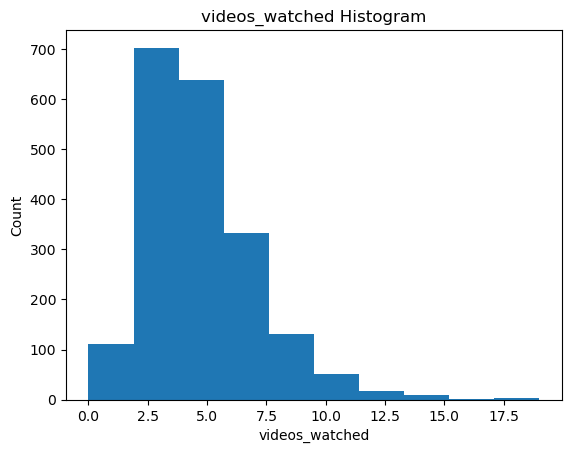

In [435]:
x=churn_df1['videos_watched']
plt.hist(x)
plt.xlabel('videos_watched')
plt.ylabel('Count')
plt.title('videos_watched Histogram')
plt.show()

**Key Observations**
- The 2nd bin (1.9–3.8) has the highest frequency (703) followed by the 3rd bin (3.8–5.7) with 639.

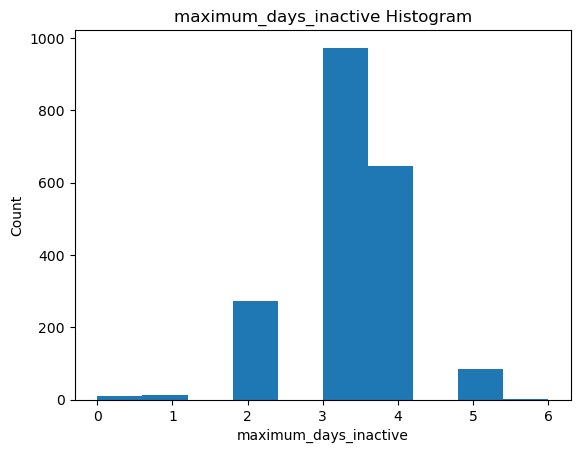

In [437]:
x=churn_df1['maximum_days_inactive']
plt.hist(x)
plt.xlabel('maximum_days_inactive')
plt.ylabel('Count')
plt.title('maximum_days_inactive Histogram')
plt.show()

**Key Observation**
- The 6th bin (3.0–3.6) has the highest frequency (973) followed by the 7th bin (3.6–4.2) with 645.

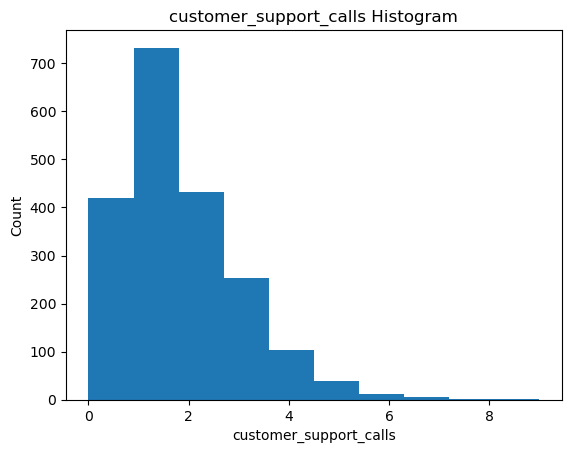

In [439]:
x=churn_df1['customer_support_calls']
plt.hist(x)
plt.xlabel('customer_support_calls')
plt.ylabel('Count')
plt.title('customer_support_calls Histogram')
plt.show()

**Key Observation**
- The 2nd bin (0.9–1.8) has the highest frequency (733) followed by the 3rd bin (1.8–2.7) with 432.

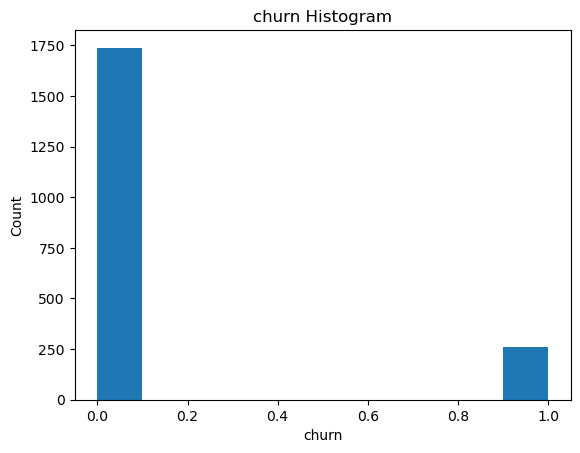

In [441]:
x=churn_df1['churn']
plt.hist(x)
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('churn Histogram')
plt.show()

**Key Observations**
- The people who stays with the same Telecom line are **1738**
- The people who churns are **262**

**Outlier Analysis**

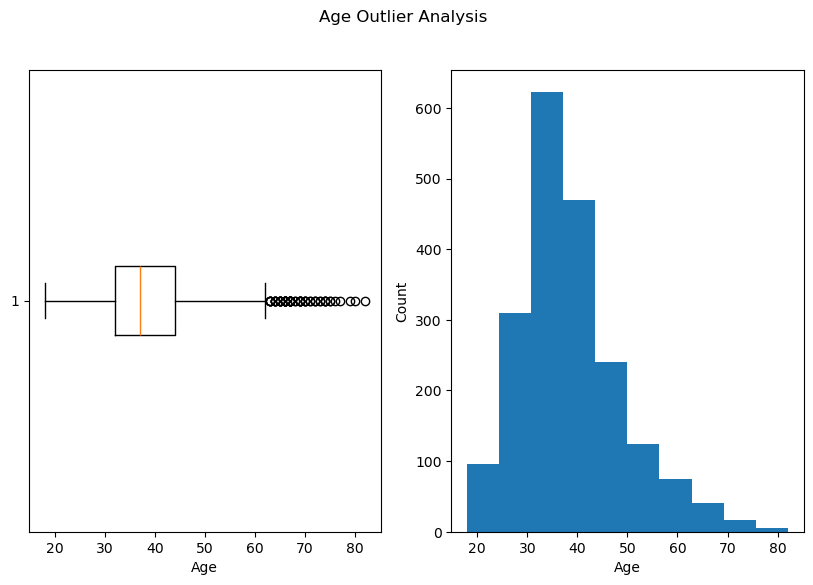

In [444]:
x_age=churn_df1['age']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_age,vert=False)
plt.xlabel('Age')
plt.subplot(1,2,2).hist(x_age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Outlier Analysis')
plt.show()

In [445]:
q1=np.quantile(x_age,0.25)
q2=np.quantile(x_age,0.50)
q3=np.quantile(x_age,0.75)
icr=q3-q1
lb=q1-1.5*icr
ub=q1+1.5*icr

In [446]:
x_a_median=np.median(x_age)
nd=[]
for i in x_age:
    if i<lb or i>ub:
        nd.append(x_a_median)
    else:
        nd.append(i)

churn_df1['age']=nd
churn_df1

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36.0,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39.0,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,37.0,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24.0,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40.0,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,37.0,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45.0,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,37.0,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40.0,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


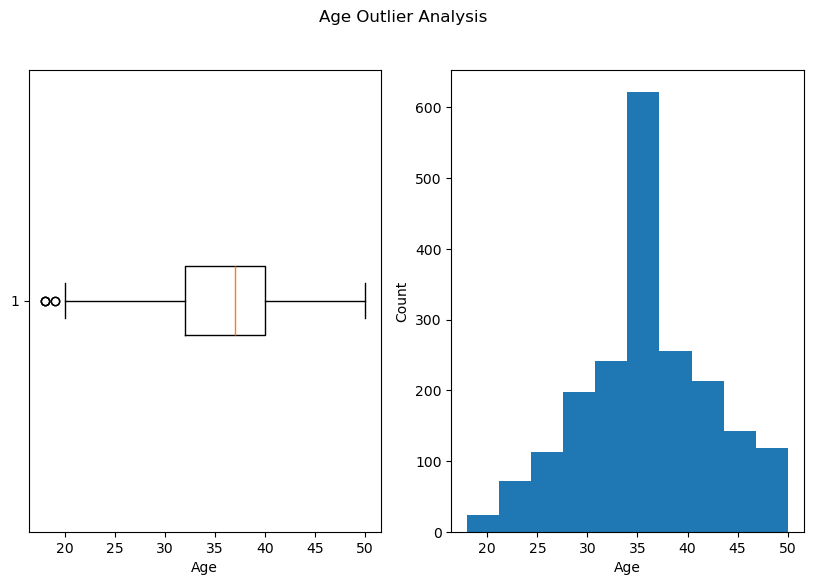

In [447]:
x_age=churn_df1['age']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_age,vert=False)
plt.xlabel('Age')
plt.subplot(1,2,2).hist(x_age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Outlier Analysis')
plt.show()

we can observe the outliers are minimised in the age column by using median technique

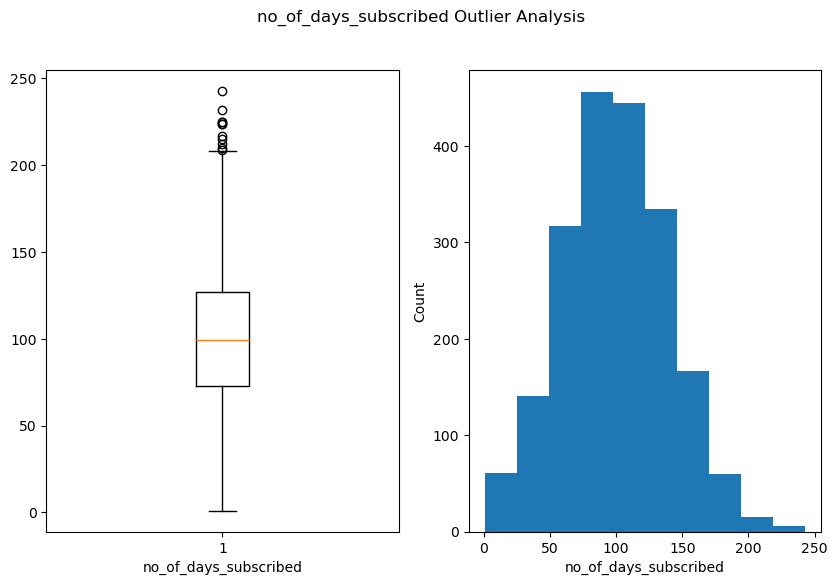

In [449]:
x_no=churn_df['no_of_days_subscribed']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_no)
plt.xlabel('no_of_days_subscribed')
plt.subplot(1,2,2).hist(x_no)
plt.xlabel('no_of_days_subscribed')
plt.ylabel('Count')
plt.suptitle('no_of_days_subscribed Outlier Analysis')
plt.show()

- There are some outliers in the no_of_days_subscribed column

In [451]:
q1=np.quantile(x_no,0.25)
q2=np.quantile(x_no,0.50)
q3=np.quantile(x_no,0.75)
icr=q3-q1
lb=q1-1.5*icr
ub=q1+1.5*icr

In [452]:
x_no_median=np.median(x_no)
nd=[]
for i in x_age:
    if i<lb or i>ub:
        nd.append(x_no_median)
    else:
        nd.append(i)

churn_df1['no_of_days_subscribed']=nd
churn_df1

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36.0,36.0,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39.0,39.0,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,37.0,37.0,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24.0,24.0,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40.0,40.0,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,37.0,37.0,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45.0,45.0,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,37.0,37.0,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40.0,40.0,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


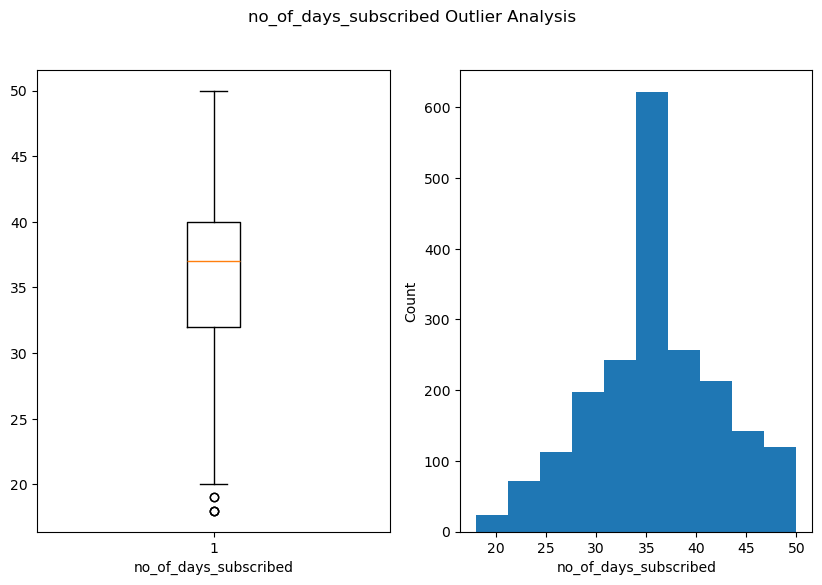

In [453]:
x_no=churn_df1['no_of_days_subscribed']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_no)
plt.xlabel('no_of_days_subscribed')
plt.subplot(1,2,2).hist(x_no)
plt.xlabel('no_of_days_subscribed')
plt.ylabel('Count')
plt.suptitle('no_of_days_subscribed Outlier Analysis')
plt.show()

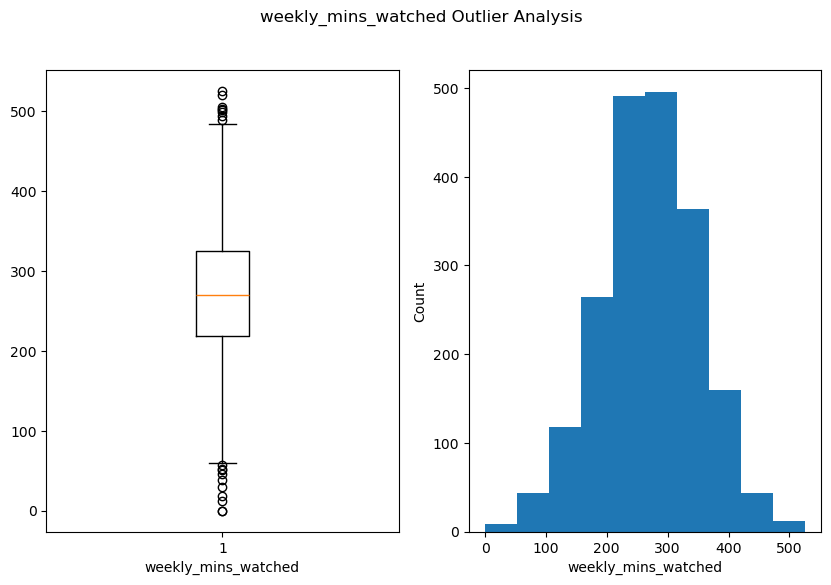

In [523]:
x_no=churn_df1['weekly_mins_watched']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_no)
plt.xlabel('weekly_mins_watched')
plt.subplot(1,2,2).hist(x_no)
plt.xlabel('weekly_mins_watched')
plt.ylabel('Count')
plt.suptitle('weekly_mins_watched Outlier Analysis')
plt.show()

In [525]:
q1=np.quantile(x_no,0.25)
q2=np.quantile(x_no,0.50)
q3=np.quantile(x_no,0.75)
icr=q3-q1
lb=q1-1.5*icr
ub=q1+1.5*icr

In [527]:
x_no_median=np.median(x_no)
nd=[]
for i in x_no:
    if i<lb or i>ub:
        nd.append(x_no_median)
    else:
        nd.append(i)

churn_df1['weekly_mins_watched']=nd
churn_df1

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36.0,36.0,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39.0,39.0,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,37.0,37.0,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24.0,24.0,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40.0,40.0,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,37.0,37.0,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45.0,45.0,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,37.0,37.0,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40.0,40.0,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


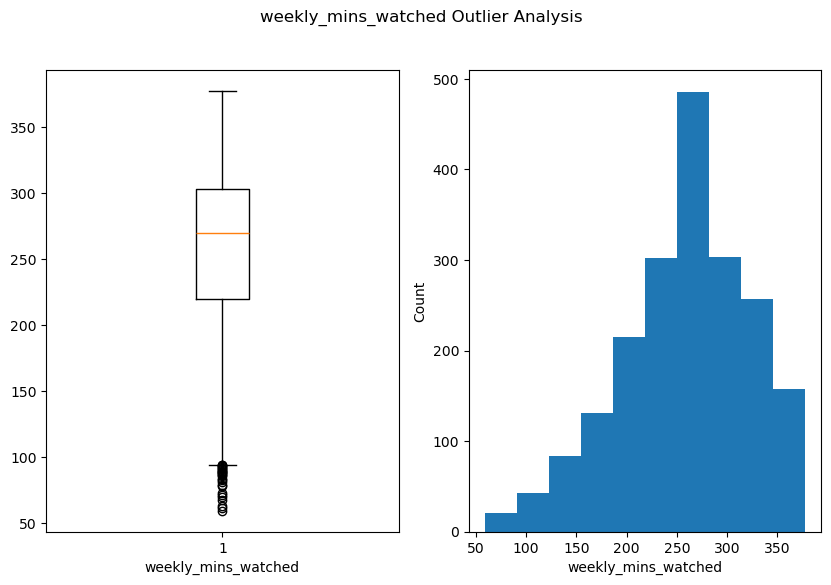

In [529]:
x_no=churn_df1['weekly_mins_watched']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_no)
plt.xlabel('weekly_mins_watched')
plt.subplot(1,2,2).hist(x_no)
plt.xlabel('weekly_mins_watched')
plt.ylabel('Count')
plt.suptitle('weekly_mins_watched Outlier Analysis')
plt.show()

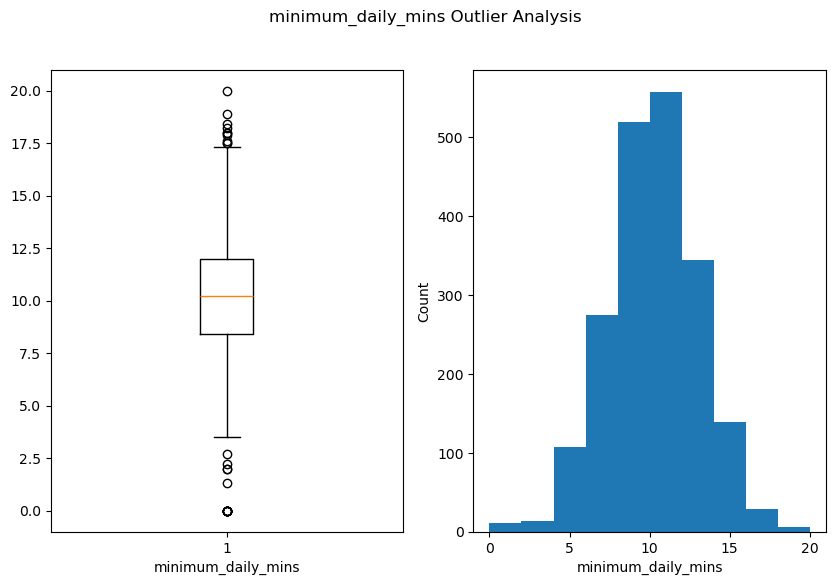

In [533]:
x_mo=churn_df1['minimum_daily_mins']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_mo)
plt.xlabel('minimum_daily_mins')
plt.subplot(1,2,2).hist(x_mo)
plt.xlabel('minimum_daily_mins')
plt.ylabel('Count')
plt.suptitle('minimum_daily_mins Outlier Analysis')
plt.show()

- we can observe no much outliers in the minimum_daily_mins

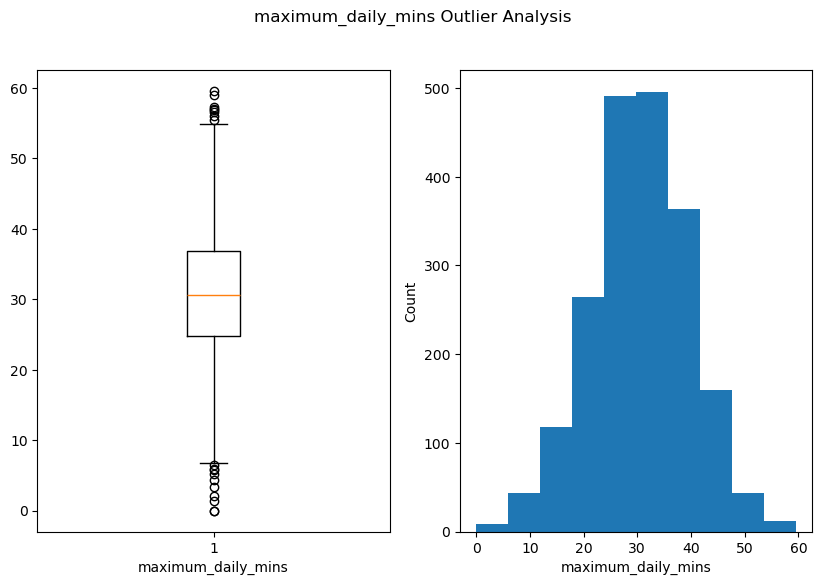

In [460]:
x_mo=churn_df1['maximum_daily_mins']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_mo)
plt.xlabel('maximum_daily_mins')
plt.subplot(1,2,2).hist(x_mo)
plt.xlabel('maximum_daily_mins')
plt.ylabel('Count')
plt.suptitle('maximum_daily_mins Outlier Analysis')
plt.show()

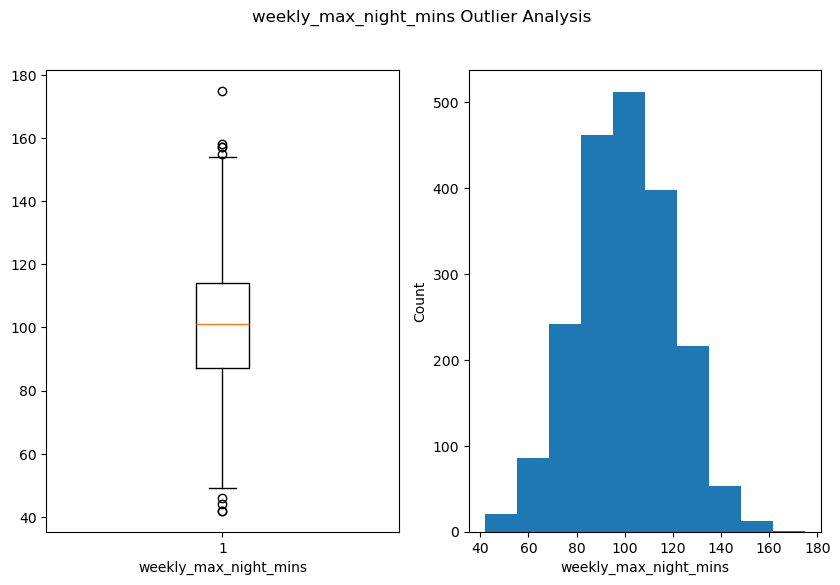

In [521]:
x_mo=churn_df1['weekly_max_night_mins']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1).boxplot(x_mo)
plt.xlabel('weekly_max_night_mins')
plt.subplot(1,2,2).hist(x_mo)
plt.xlabel('weekly_max_night_mins')
plt.ylabel('Count')
plt.suptitle('weekly_max_night_mins Outlier Analysis')
plt.show()

**Bi-Variate Analysis**

In [536]:
cat_cols1

Index(['gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [538]:
co1=churn_df1['gender']
co2=churn_df1['multi_screen']
co3=churn_df1['mail_subscribed']

<Axes: xlabel='gender'>

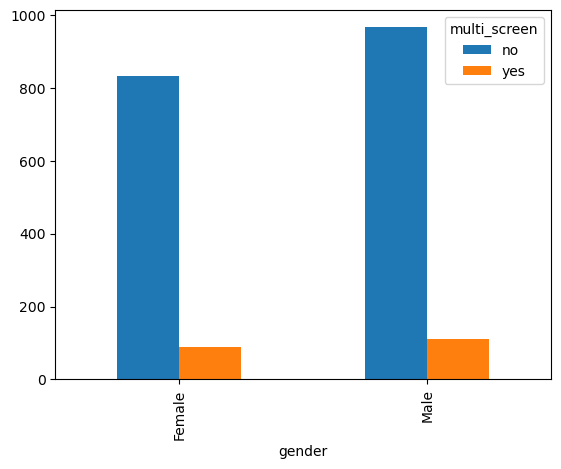

In [544]:
p1=pd.crosstab(co1,co2)
p1.plot(kind='bar')

<Axes: xlabel='gender'>

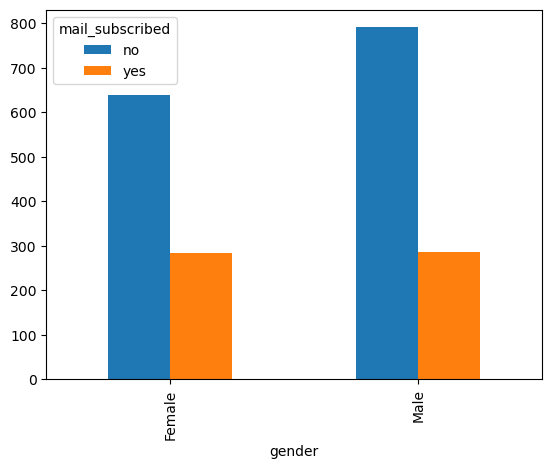

In [546]:
p2=pd.crosstab(co1,co3)
p2.plot(kind='bar')

<Axes: xlabel='gender'>

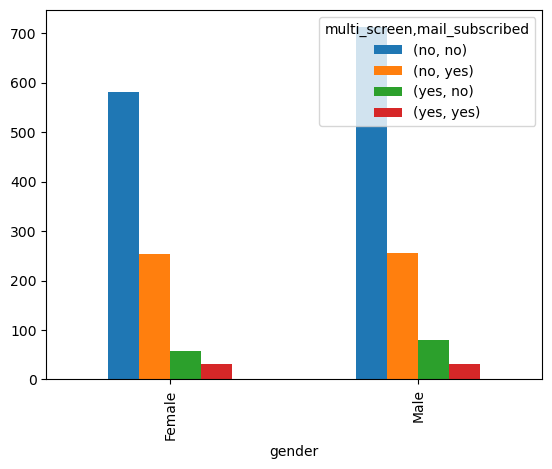

In [548]:
p3=pd.crosstab(co1,[co2,co3])
p3.plot(kind='bar')

In [550]:
churn_df1.corr(numeric_only=True)

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,1.000000,-0.014052,0.012958,-0.004051,0.031683,-0.003312,0.019790,0.007981,-0.022316
no_of_days_subscribed,NaN,1.000000,1.000000,-0.014052,0.012958,-0.004051,0.031683,-0.003312,0.019790,0.007981,-0.022316
weekly_mins_watched,NaN,-0.014052,-0.014052,1.000000,-0.016213,0.820657,0.030637,-0.004429,-0.006667,-0.053461,0.013398
minimum_daily_mins,NaN,0.012958,0.012958,-0.016213,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.066646
maximum_daily_mins,NaN,-0.004051,-0.004051,0.820657,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.162874
weekly_max_night_mins,NaN,0.031683,0.031683,0.030637,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.006917
videos_watched,NaN,-0.003312,-0.003312,-0.004429,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.019314
maximum_days_inactive,NaN,0.019790,0.019790,-0.006667,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044778
customer_support_calls,NaN,0.007981,0.007981,-0.053461,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.204774


In [552]:
corr=churn_df1.corr(numeric_only=True)

<Axes: >

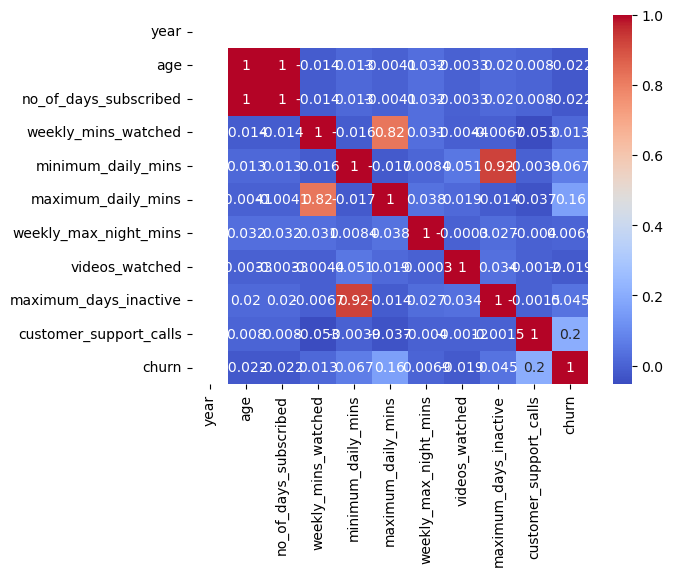

In [554]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

**Key observations**
- Maximun_days_inactive and minimum_daily_min are highly correalated i.e The persons who use minimumly are the most inactive

**Encoding**

In [561]:
churn_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [563]:
from sklearn.preprocessing import LabelEncoder

In [569]:
le=LabelEncoder()
churn_df1['gender']=le.fit_transform(churn_df1['gender'])
churn_df1['gender']

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    1
1997    1
1998    1
1999    1
Name: gender, Length: 2000, dtype: int32

In [571]:
pd.get_dummies(churn_df1,columns=['multi_screen'])

,year,gender,age,no_of_days_subscribed,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,multi_screen_no,multi_screen_yes
0,2015,0,36.0,36.0,no,148.35,12.2,16.81,82,1,4.0,1,0.0,True,False
1,2015,0,39.0,39.0,no,294.45,7.7,33.37,87,3,3.0,2,0.0,True,False
2,2015,0,37.0,37.0,no,87.30,11.9,9.89,91,1,4.0,5,1.0,True,False
3,2015,0,24.0,24.0,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,True,False
4,2015,0,40.0,40.0,no,243.00,10.9,27.54,83,7,3.0,1,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,37.0,37.0,yes,182.25,11.3,20.66,97,5,4.0,2,0.0,True,False
1996,2015,1,45.0,45.0,no,273.45,9.3,30.99,116,3,3.0,1,0.0,True,False
1997,2015,1,37.0,37.0,no,128.85,15.6,14.60,110,16,5.0,0,0.0,True,False
1998,2015,1,40.0,40.0,no,178.05,10.4,20.18,100,6,3.0,3,0.0,True,False


**scaling**

In [574]:
from sklearn.preprocessing import StandardScaler

In [578]:
sc=StandardScaler()
churn_df1['weekly_mins_watched_z']=sc.fit_transform(churn_df1[['weekly_mins_watched']])

In [580]:
churn_df1['weekly_mins_watched_z'].idxmax()==churn_df1['weekly_mins_watched'].idxmax()

True

In [582]:
churn_df1

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,weekly_mins_watched_z
0,2015,0,36.0,36.0,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,-1.719722
1,2015,0,39.0,39.0,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0.566017
2,2015,0,37.0,37.0,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,-2.674851
3,2015,0,24.0,24.0,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0.986086
4,2015,0,40.0,40.0,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,-0.238920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,37.0,37.0,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0,-1.189355
1996,2015,1,45.0,45.0,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,0.237472
1997,2015,1,37.0,37.0,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,-2.024800
1998,2015,1,40.0,40.0,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0,-1.255064


In [584]:
from sklearn.preprocessing import MinMaxScaler

In [590]:
msc=MinMaxScaler()
churn_df1['weekly_mins_watched_mm']=msc.fit_transform(churn_df1[['weekly_mins_watched']])

In [594]:
churn_df1['weekly_mins_watched_mm'].idxmax()==churn_df1['weekly_mins_watched'].idxmax()

True